<a href="https://colab.research.google.com/github/Reet1992/Time_Series/blob/master/One_step_ahead_forecasting_with_sarimax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
!pip3 install quandl

In [4]:
import quandl 

quandl.ApiConfig.api_key = 'HyGzqyay5oxbakcCwUGi!'



In [5]:
df = pd.read_csv("https://www.quandl.com/api/v3/datatables/SHARADAR/SEP.csv?api_key=HyGzqyay5oxbakcCwUGi")

In [6]:
df.head()

,ticker,date,open,high,low,close,volume,dividends,closeunadj,lastupdated
0,XOM,2018-12-31,68.32,69.145,67.66,68.19,15807007.0,0.0,68.19,2020-05-01
1,XOM,2018-12-28,69.18,69.580,67.82,68.17,19706697.0,0.0,68.17,2020-05-01
2,XOM,2018-12-27,67.74,68.940,66.08,68.94,22077044.0,0.0,68.94,2020-05-01
3,XOM,2018-12-26,66.18,68.655,64.65,68.64,24887738.0,0.0,68.64,2020-05-01
4,XOM,2018-12-24,66.87,67.530,65.44,65.51,14262825.0,0.0,65.51,2020-05-01


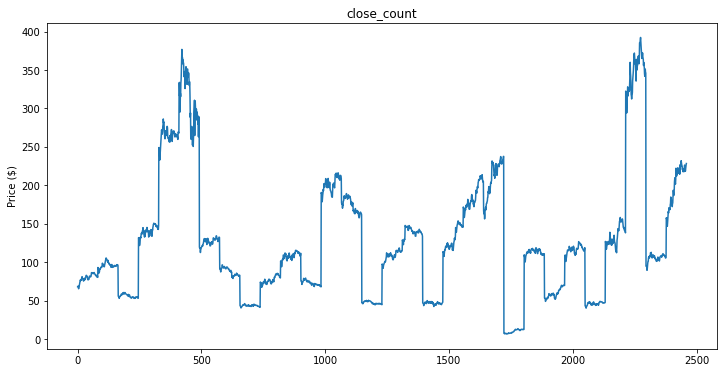

In [7]:
# The adjusted close accounts for stock splits, so that is what we should graph
plt.figure(figsize=(12,6))

plt.plot(df.index, df['closeunadj'])
plt.title('close_count')
plt.ylabel('Price ($)');
plt.show()


In [8]:
df2 = df[['date','lastupdated','closeunadj']]
df2['date'] = pd.to_datetime(df2['date'])
df2.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,lastupdated,closeunadj
0,2018-12-31,2020-05-01,68.19
1,2018-12-28,2020-05-01,68.17
2,2018-12-27,2020-05-01,68.94
3,2018-12-26,2020-05-01,68.64
4,2018-12-24,2020-05-01,65.51


In [9]:
df2.head()


,date,lastupdated,closeunadj
0,2018-12-31,2020-05-01,68.19
1,2018-12-28,2020-05-01,68.17
2,2018-12-27,2020-05-01,68.94
3,2018-12-26,2020-05-01,68.64
4,2018-12-24,2020-05-01,65.51


In [10]:
df2['date'].min(), df2['date'].max()

(Timestamp('2018-09-04 00:00:00'), Timestamp('2018-12-31 00:00:00'))

In [11]:
df3 = df2.groupby('date')['closeunadj'].sum().reset_index()

In [12]:
df3.head()

,date,closeunadj
0,2018-09-04,3929.59
1,2018-09-05,3923.09
2,2018-09-06,3925.80
3,2018-09-07,3897.63
4,2018-09-10,3908.98


In [13]:
df3['date'] = pd.to_datetime(df3['date'])

In [14]:
df3['closeunadj'].min(),df3['closeunadj'].max()

(3348.919999999999, 4049.1299999999997)

In [15]:
df3.head()

,date,closeunadj
0,2018-09-04,3929.59
1,2018-09-05,3923.09
2,2018-09-06,3925.80
3,2018-09-07,3897.63
4,2018-09-10,3908.98


In [16]:
#df3 = df3['closeunadj'].resample('MS').mean()

In [17]:
df3= df3.set_index('date')
df3.index

DatetimeIndex(['2018-09-04', '2018-09-05', '2018-09-06', '2018-09-07',
               '2018-09-10', '2018-09-11', '2018-09-12', '2018-09-13',
               '2018-09-14', '2018-09-17', '2018-09-18', '2018-09-19',
               '2018-09-20', '2018-09-21', '2018-09-24', '2018-09-25',
               '2018-09-26', '2018-09-27', '2018-09-28', '2018-10-01',
               '2018-10-02', '2018-10-03', '2018-10-04', '2018-10-05',
               '2018-10-08', '2018-10-09', '2018-10-10', '2018-10-11',
               '2018-10-12', '2018-10-15', '2018-10-16', '2018-10-17',
               '2018-10-18', '2018-10-19', '2018-10-22', '2018-10-23',
               '2018-10-24', '2018-10-25', '2018-10-26', '2018-10-29',
               '2018-10-30', '2018-10-31', '2018-11-01', '2018-11-02',
               '2018-11-05', '2018-11-06', '2018-11-07', '2018-11-08',
               '2018-11-09', '2018-11-12', '2018-11-13', '2018-11-14',
               '2018-11-15', '2018-11-16', '2018-11-19', '2018-11-20',
      

In [18]:
df3.head()

,closeunadj
date,
2018-09-04,3929.59
2018-09-05,3923.09
2018-09-06,3925.80
2018-09-07,3897.63
2018-09-10,3908.98


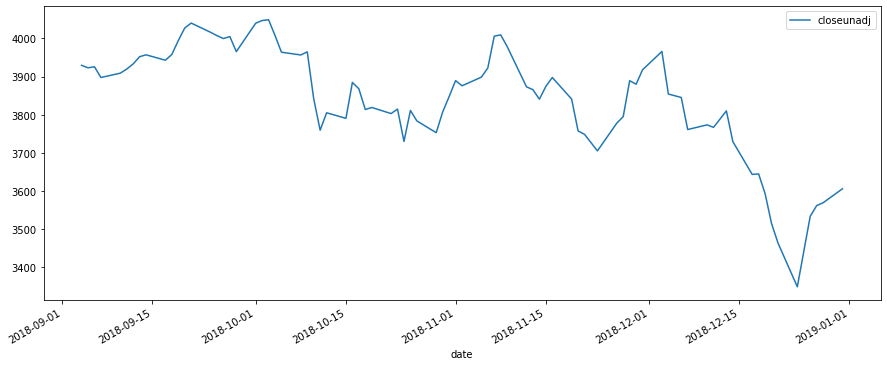

In [19]:
#### Original Plot

df3.plot(figsize=(15, 6))
plt.show()

In [20]:
#### Decomposition #### 

import warnings
import itertools
warnings.filterwarnings("ignore")
import statsmodels.api as sm

from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

In [21]:
df3.index

DatetimeIndex(['2018-09-04', '2018-09-05', '2018-09-06', '2018-09-07',
               '2018-09-10', '2018-09-11', '2018-09-12', '2018-09-13',
               '2018-09-14', '2018-09-17', '2018-09-18', '2018-09-19',
               '2018-09-20', '2018-09-21', '2018-09-24', '2018-09-25',
               '2018-09-26', '2018-09-27', '2018-09-28', '2018-10-01',
               '2018-10-02', '2018-10-03', '2018-10-04', '2018-10-05',
               '2018-10-08', '2018-10-09', '2018-10-10', '2018-10-11',
               '2018-10-12', '2018-10-15', '2018-10-16', '2018-10-17',
               '2018-10-18', '2018-10-19', '2018-10-22', '2018-10-23',
               '2018-10-24', '2018-10-25', '2018-10-26', '2018-10-29',
               '2018-10-30', '2018-10-31', '2018-11-01', '2018-11-02',
               '2018-11-05', '2018-11-06', '2018-11-07', '2018-11-08',
               '2018-11-09', '2018-11-12', '2018-11-13', '2018-11-14',
               '2018-11-15', '2018-11-16', '2018-11-19', '2018-11-20',
      

In [22]:
df4 = df3['closeunadj'].resample('MS').mean()

In [23]:
df3

,closeunadj
date,
2018-09-04,3929.59
2018-09-05,3923.09
2018-09-06,3925.80
2018-09-07,3897.63
2018-09-10,3908.98
...,...
2018-12-24,3348.92
2018-12-26,3533.88
2018-12-27,3561.81


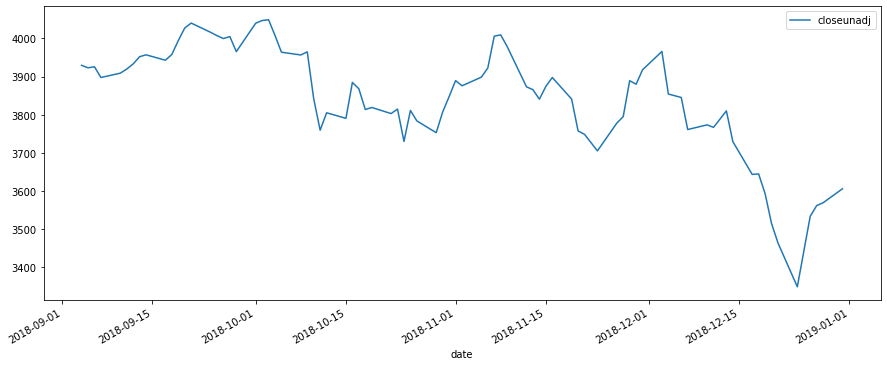

In [24]:
df3.plot(figsize=(15, 6))
plt.show()

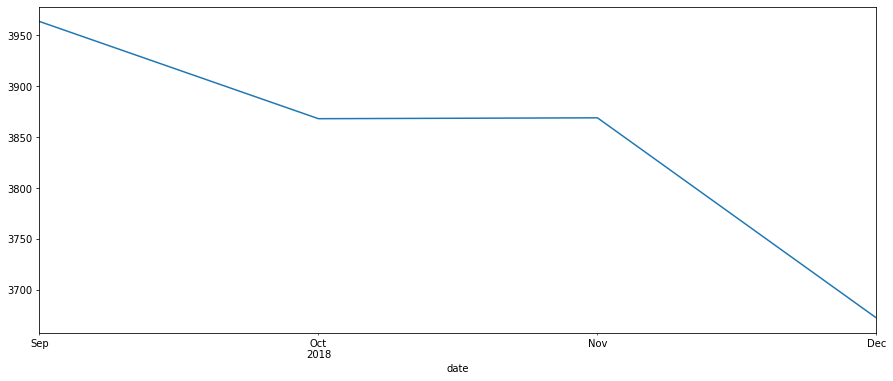

In [25]:
df4.plot(figsize=(15, 6))
plt.show()

In [27]:
df5 = pd.DataFrame(data=df3, index=pd.date_range(start=df3.index[81], periods=82, freq='w'), columns=['closeunadj'])


In [28]:
df5

,closeunadj
2019-01-06,NaN
2019-01-13,NaN
2019-01-20,NaN
2019-01-27,NaN
2019-02-03,NaN
...,...
2020-06-28,NaN
2020-07-05,NaN
2020-07-12,NaN
2020-07-19,NaN


**To avoid generating NAN values extrapolate trend is applied here in the seasonal decomposition**

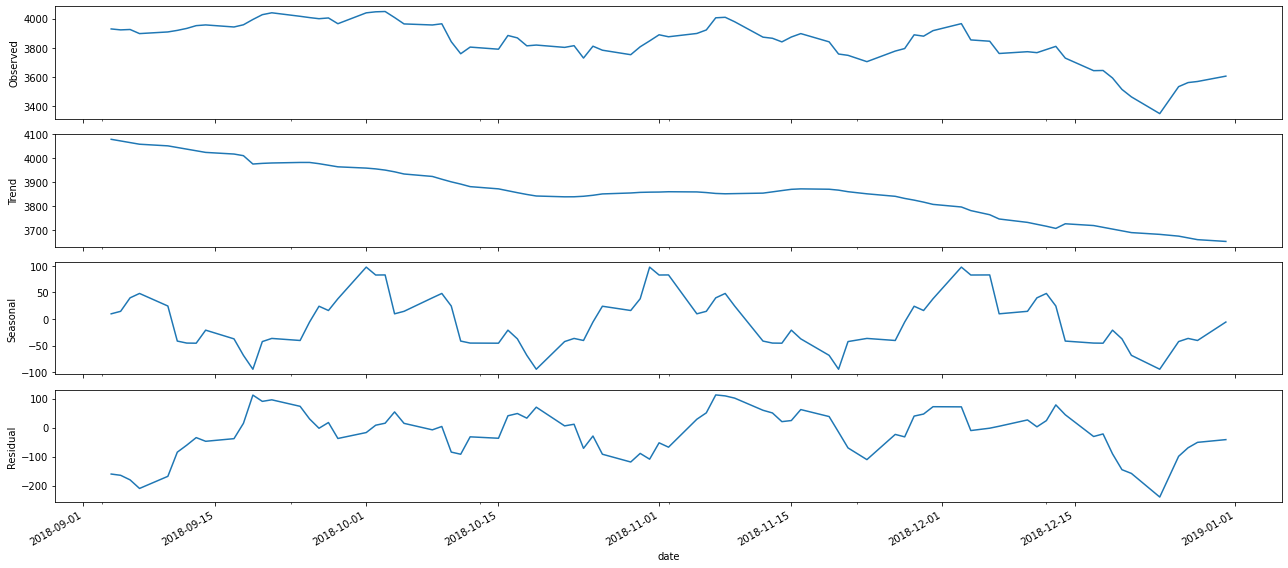

In [29]:


from statsmodels.tsa import seasonal

decomposed1 = seasonal.seasonal_decompose(x=df3, freq=22, extrapolate_trend='freq',model = 'additive')
fig = decomposed1.plot()
plt.show()

[(0, 0, 0, 16), (0, 0, 1, 16), (0, 1, 0, 16), (0, 1, 1, 16), (1, 0, 0, 16), (1, 0, 1, 16), (1, 1, 0, 16), (1, 1, 1, 16)]
ARIMA(1, 1, 1)x(1, 1, 1, 16)12 - AIC:894.9168455725026
                           Statespace Model Results                           
Dep. Variable:             closeunadj   No. Observations:                   82
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -445.458
Date:                Sun, 15 Nov 2020   AIC                            894.917
Time:                        06:06:14   BIC                            899.730
Sample:                             0   HQIC                           896.849
                                 - 82                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      0.001  

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

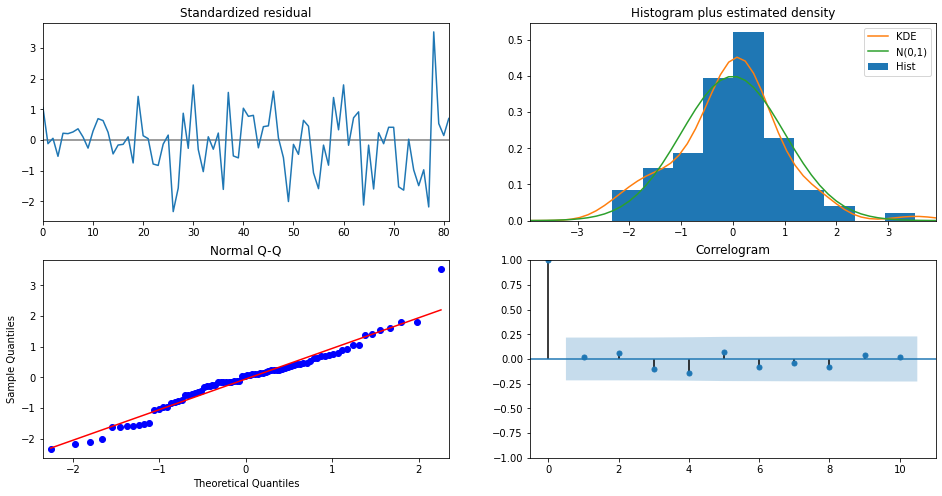

In [30]:
#### Time Series prediction with ARIMA 


p = d = q = range(0, 2)
pd = list(itertools.product(p, d, q))
seasonal_pd = [(x[0], x[1], x[2],16) for x in list(itertools.product(p, d,q))]

print(seasonal_pd)

for param in pd:
    for param_seasonal in seasonal_pd:        
        mod = sm.tsa.statespace.SARIMAX(df3['closeunadj'])
results = mod.fit()
print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

### Fitting with the latest Value

mod = sm.tsa.statespace.SARIMAX(df3['closeunadj'])
results = mod.fit()

print(results.summary())


#### plot_result_diagnostic statistics ##

results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [31]:
#### Getting the BEst paramters #### 



for param in pd:
    for param_seasonal in seasonal_pd:
            mod = sm.tsa.statespace.SARIMAX(df3['closeunadj'],order=param,seasonal_order=(0,0,0,0))
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

ARIMA(0, 0, 0)x(0, 0, 0, 16)12 - AIC:1588.5612805126068
ARIMA(0, 0, 0)x(0, 0, 1, 16)12 - AIC:1588.5612805126068
ARIMA(0, 0, 0)x(0, 1, 0, 16)12 - AIC:1588.5612805126068
ARIMA(0, 0, 0)x(0, 1, 1, 16)12 - AIC:1588.5612805126068
ARIMA(0, 0, 0)x(1, 0, 0, 16)12 - AIC:1588.5612805126068
ARIMA(0, 0, 0)x(1, 0, 1, 16)12 - AIC:1588.5612805126068
ARIMA(0, 0, 0)x(1, 1, 0, 16)12 - AIC:1588.5612805126068
ARIMA(0, 0, 0)x(1, 1, 1, 16)12 - AIC:1588.5612805126068
ARIMA(0, 0, 1)x(0, 0, 0, 16)12 - AIC:1482.2794427261558
ARIMA(0, 0, 1)x(0, 0, 1, 16)12 - AIC:1482.2794427261558
ARIMA(0, 0, 1)x(0, 1, 0, 16)12 - AIC:1482.2794427261558
ARIMA(0, 0, 1)x(0, 1, 1, 16)12 - AIC:1482.2794427261558
ARIMA(0, 0, 1)x(1, 0, 0, 16)12 - AIC:1482.2794427261558
ARIMA(0, 0, 1)x(1, 0, 1, 16)12 - AIC:1482.2794427261558
ARIMA(0, 0, 1)x(1, 1, 0, 16)12 - AIC:1482.2794427261558


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

ARIMA(0, 0, 1)x(1, 1, 1, 16)12 - AIC:1482.2794427261558
ARIMA(0, 1, 0)x(0, 0, 0, 16)12 - AIC:873.6118206069243
ARIMA(0, 1, 0)x(0, 0, 1, 16)12 - AIC:873.6118206069243
ARIMA(0, 1, 0)x(0, 1, 0, 16)12 - AIC:873.6118206069243
ARIMA(0, 1, 0)x(0, 1, 1, 16)12 - AIC:873.6118206069243
ARIMA(0, 1, 0)x(1, 0, 0, 16)12 - AIC:873.6118206069243
ARIMA(0, 1, 0)x(1, 0, 1, 16)12 - AIC:873.6118206069243
ARIMA(0, 1, 0)x(1, 1, 0, 16)12 - AIC:873.6118206069243
ARIMA(0, 1, 0)x(1, 1, 1, 16)12 - AIC:873.6118206069243
ARIMA(0, 1, 1)x(0, 0, 0, 16)12 - AIC:875.5559519980033
ARIMA(0, 1, 1)x(0, 0, 1, 16)12 - AIC:875.5559519980033


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

ARIMA(0, 1, 1)x(0, 1, 0, 16)12 - AIC:875.5559519980033
ARIMA(0, 1, 1)x(0, 1, 1, 16)12 - AIC:875.5559519980033
ARIMA(0, 1, 1)x(1, 0, 0, 16)12 - AIC:875.5559519980033
ARIMA(0, 1, 1)x(1, 0, 1, 16)12 - AIC:875.5559519980033
ARIMA(0, 1, 1)x(1, 1, 0, 16)12 - AIC:875.5559519980033
ARIMA(0, 1, 1)x(1, 1, 1, 16)12 - AIC:875.5559519980033
ARIMA(1, 0, 0)x(0, 0, 0, 16)12 - AIC:894.9168455725026

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh


ARIMA(1, 0, 0)x(0, 0, 1, 16)12 - AIC:894.9168455725026
ARIMA(1, 0, 0)x(0, 1, 0, 16)12 - AIC:894.9168455725026
ARIMA(1, 0, 0)x(0, 1, 1, 16)12 - AIC:894.9168455725026
ARIMA(1, 0, 0)x(1, 0, 0, 16)12 - AIC:894.9168455725026
ARIMA(1, 0, 0)x(1, 0, 1, 16)12 - AIC:894.9168455725026
ARIMA(1, 0, 0)x(1, 1, 0, 16)12 - AIC:894.9168455725026
ARIMA(1, 0, 0)x(1, 1, 1, 16)12 - AIC:894.9168455725026


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

ARIMA(1, 0, 1)x(0, 0, 0, 16)12 - AIC:896.8591618806663
ARIMA(1, 0, 1)x(0, 0, 1, 16)12 - AIC:896.8591618806663
ARIMA(1, 0, 1)x(0, 1, 0, 16)12 - AIC:896.8591618806663


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 1)x(0, 1, 1, 16)12 - AIC:896.8591618806663
ARIMA(1, 0, 1)x(1, 0, 0, 16)12 - AIC:896.8591618806663
ARIMA(1, 0, 1)x(1, 0, 1, 16)12 - AIC:896.8591618806663


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 0, 16)12 - AIC:896.8591618806663
ARIMA(1, 0, 1)x(1, 1, 1, 16)12 - AIC:896.8591618806663
ARIMA(1, 1, 0)x(0, 0, 0, 16)12 - AIC:875.5483680966844
ARIMA(1, 1, 0)x(0, 0, 1, 16)12 - AIC:875.5483680966844
ARIMA(1, 1, 0)x(0, 1, 0, 16)12 - AIC:875.5483680966844
ARIMA(1, 1, 0)x(0, 1, 1, 16)12 - AIC:875.5483680966844


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

ARIMA(1, 1, 0)x(1, 0, 0, 16)12 - AIC:875.5483680966844
ARIMA(1, 1, 0)x(1, 0, 1, 16)12 - AIC:875.5483680966844
ARIMA(1, 1, 0)x(1, 1, 0, 16)12 - AIC:875.5483680966844
ARIMA(1, 1, 0)x(1, 1, 1, 16)12 - AIC:875.5483680966844
ARIMA(1, 1, 1)x(0, 0, 0, 16)12 - AIC:876.6173906763512
ARIMA(1, 1, 1)x(0, 0, 1, 16)12 - AIC:876.6173906763512


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

ARIMA(1, 1, 1)x(0, 1, 0, 16)12 - AIC:876.6173906763512
ARIMA(1, 1, 1)x(0, 1, 1, 16)12 - AIC:876.6173906763512
ARIMA(1, 1, 1)x(1, 0, 0, 16)12 - AIC:876.6173906763512


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 16)12 - AIC:876.6173906763512
ARIMA(1, 1, 1)x(1, 1, 0, 16)12 - AIC:876.6173906763512
ARIMA(1, 1, 1)x(1, 1, 1, 16)12 - AIC:876.6173906763512


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                           Statespace Model Results                           
Dep. Variable:             closeunadj   No. Observations:                   82
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -435.309
Date:                Sun, 15 Nov 2020   AIC                            876.617
Time:                        06:06:44   BIC                            883.801
Sample:                             0   HQIC                           879.499
                                 - 82                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9344      0.162     -5.769      0.000      -1.252      -0.617
ma.L1          0.9823      0.168      5.854      0.000       0.653       1.311
sigma2      2712.0447    339.153      7.997      0.0

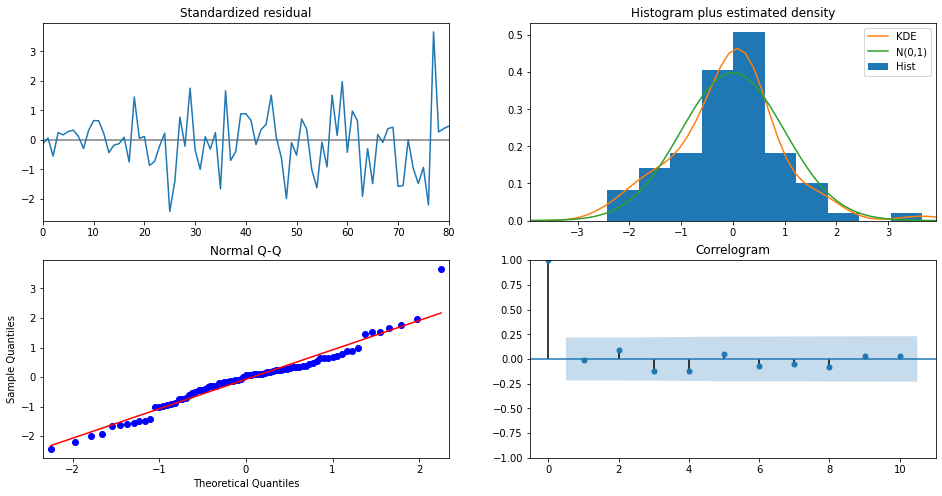

In [32]:
mod = sm.tsa.statespace.SARIMAX(df3['closeunadj'],order=(1, 1, 1),seasonal_order=(0,0,0,16))
results = mod.fit()

print(results.summary())

results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [33]:
len(df3)

82

In [34]:
pred = results.get_prediction(start=df3.index[70], dynamic=False)
pred_ci = pred.conf_int()

In [35]:
pred_ci.iloc[:,1]

date
2018-12-13    3889.929894
2018-12-14    3913.880886
2018-12-17    3826.306884
2018-12-18    3746.965653
2018-12-19    3745.647648
2018-12-20    3694.221064
2018-12-21    3614.563631
2018-12-24    3565.882381
2018-12-26    3445.588357
2018-12-27    3650.047884
2018-12-28    3651.433449
2018-12-31    3683.959181
Name: upper closeunadj, dtype: float64

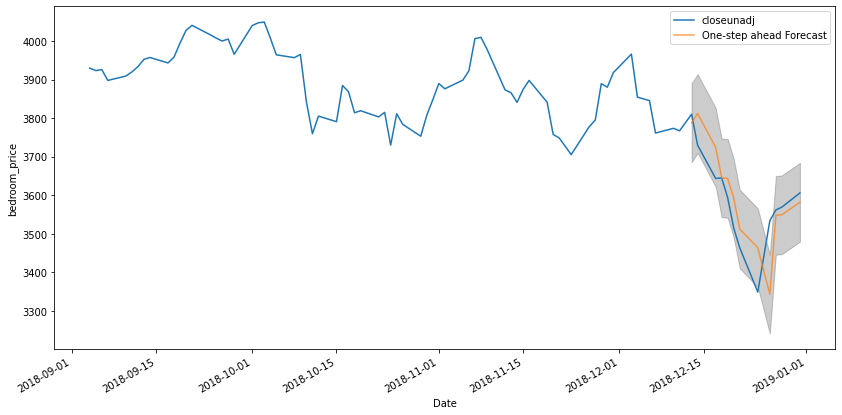

In [36]:
ax = df3['2018-09-04':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.2)


ax.set_xlabel('Date')
ax.set_ylabel('bedroom_price')
plt.legend()
plt.show()